### a) Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 


First lets study our data:

In [59]:
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
df = pandas.read_csv("sheet.csv")
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


The problem states that the average order value (AOV) was incorrectly reported as $3145.13. Lets try to replicate that:

In [25]:
mean = df['order_amount'].mean(axis=0)
print("mean: " + str(mean))

mean: 3145.128


So the AOV was naively calculated as the mean of the "order_amount" column. 

Lets first verify the claim that this answer is a poor representation. We can plot a scatter plot of order value against order number, just to get a rough idea of the distribution of order values. 

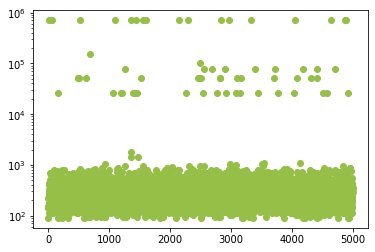

In [41]:
plt.scatter(x=df["order_id"],y= df["order_amount"], color=["#96BF48"])
ax = plt.gca()
ax.set_yscale('log')

Note that the y axis of this plot is in log scale. We first see that the vast majority of values are between 100 and 1000. Therefore, reporting the AOV as $3145.13 seems quite high, as mentioned in the question. 

We also note that there are a number of orders of value close to 10^6. It is likely that these outliers are what causes the mean to be so high. Lets verify that these values are indeed valid entries and not errors to determine whether they should be removed.

In [68]:
df[df['order_amount'] > 500000].head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00


It seems like the order amount for these orders are extremely high because the customer is ordering 2000 pairs, which makes sense. Lets keep these values in, and instead find a metric that is robust to outliers.

### b) What metric would you report for this dataset?

As previously mentioned, we need a metric that is robust to outliers. Reporting the median should resolve this issue.

### c) What is its value?


In [58]:
df["order_amount"].describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

The value of the median is $284, which makes a lot more sense. Lets plot a box and whisker plot to visualize how well this new average represents our data.

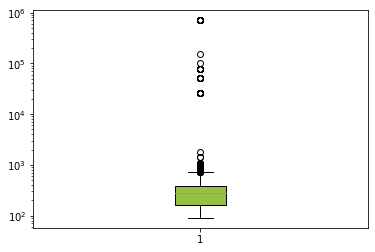

In [57]:
plt.boxplot(df["order_amount"], patch_artist = True, boxprops=dict(facecolor="#96BF48"))
ax = plt.gca()
ax.set_yscale('log')

We can see that Q4 of the box and whisker plot disregards outlier orders of very high values. The median seems to fall within the range of the greatest density. Therefore, we can report the AOV as $284.